

#**Team Kappa** - Team Assignment 3: Customer Experience from Social Media - Final CoLab Analysis - **Vrbo**
##**[Vrbo Twitter](https://twitter.com/vrbo?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)**
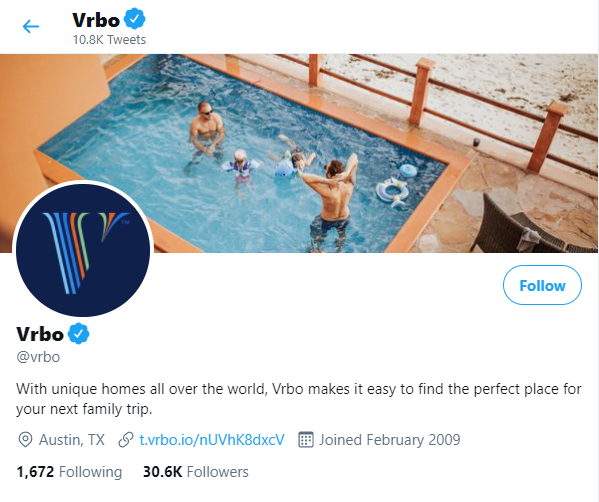

Team Kappa: Nick Belk, Grace Channell, Jack Davidson, Randy Le, Terry Neza, Zach Goodman
[Link to Scraped Data and Colab Folder](https://drive.google.com/drive/folders/1VXOOL8Z4zrjNGOeT5yQgnEoCbuBtrYhW?usp=sharing)

##Section 1: Sentiment Analysis of Vrbo tweets from March 2020

In [ ]:
#Import libraries
import pandas as pd
import numpy as np

In [ ]:
#Read Scraped Vrbo tweets from March 2020
vrbo_1 = pd.read_json('./vrbo_1.json', lines=True)

In [ ]:
#Append the username of the tweet to the dataframe and remove any tweets created by Vrbo
users = []
for index, row in vrbo_1.iterrows():
    users.append(row['user']['username'])
vrbo_1['username'] = users
vrbo_1 = vrbo_1[vrbo_1['username'] != 'vrbo']
vrbo_1

url  ...        username
0      https://twitter.com/AmyFree21/status/124477557...  ...       AmyFree21
1      https://twitter.com/jbunting44/status/12447753...  ...      jbunting44
2      https://twitter.com/selsrarity/status/12447752...  ...      selsrarity
3      https://twitter.com/AmyFree21/status/124477520...  ...       AmyFree21
4      https://twitter.com/32801Nole/status/124477502...  ...       32801Nole
...                                                  ...  ...             ...
11597  https://twitter.com/cottage_green/status/12339...  ...   cottage_green
11598  https://twitter.com/booblevard/status/12339172...  ...      booblevard
11599  https://twitter.com/dandandan210/status/123391...  ...    dandandan210
11600  https://twitter.com/groogruxking40/status/1233...  ...  groogruxking40
11601  https://twitter.com/sleepbranson/status/123390...  ...    sleepbranson

[11116 rows x 24 columns]

In [ ]:
# !pip install vaderSentiment

In [ ]:
#Import the Sentiment Intensity Analyzer as analyser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
#Define the sentiment_analyzer_scores function to streamline the SentimentIntensityAnalyzer
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score
#     print("{:-<55} {}".format(sentence, str(score)), "\n")

In [ ]:
#Remove the 3K giveaway advertisment that was very common in the Vrbo tweets, save the tweet content and dates 
vrbo_1_tweets = [row[1]['content'] for row in vrbo_1.iterrows() if '$3K' not in row[1]['content']]
vrbo_1_dates = [row[1]['date'].date() for row in vrbo_1.iterrows() if '$3K' not in row[1]['content']]

In [ ]:
#Create a sting list of the regular expressions we want to remove from the vrbo tweets for better analysis 
# import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
pat7 = r"\n"
pat8 = '\r\n'
pat9 = r'|'.join((r'&amp;',r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;'))
# Combine all patterns
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6, pat7, pat8, pat9))

In [ ]:
#Remove the messy regular expressions and check to see if it worked for March 2020 Vrbo
vrbo_1_tweets = [re.sub(combined_pat, '', w) for w in vrbo_1_tweets]
vrbo_1_tweets

['vrbo The home owner we booked with is unwilling to reschedule or refund. We have been ripped off!',
 'darrenrovell Vrbo no refund for 4/20. Did get a credit but only for limited dates',
 'AnnaSeavey vrbo yall better give her back her money or ya catching these hands on sight😤.',
 'vrbo not forcing home owners to reschedule or refund. Will mot use or recommend we planned a trip w an 84 yo. Shameless',
 'chovy_s JEichenblatt Airbnb yashar vrbo Our trip to England was going to be my wife’s 1st time there. We planned it for so long. Was going to show her my childhood home, school, and get fish  chips in my old chippy. Now it’s looking like Airbnb is just going to keep my money making it a lot harder for us to go later.',
 'I’m being ripped off by vrbo 🙋🏻\u200d♀️ boycottvrbo ',
 'stayloom Stop being out-of-state,  money-hungry STR landlords. Refund people’s deposits! vrbo Airbnb This is a crisis, you greedy people!! CoronavirusOutbreak neworleans washingtonpost nytimes ScamAware bywater a

In [ ]:
#Append the sentiment score to all of the tweets in the March 2020 Vrbo tweets list
vrbo_1_sentiment = []
for a in vrbo_1_tweets:
    vrbo_1_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))
vrbo_1_sentiment

[('vrbo The home owner we booked with is unwilling to reschedule or refund. We have been ripped off!',
  0.0),
 ('darrenrovell Vrbo no refund for 4/20. Did get a credit but only for limited dates',
  -0.2846),
 ('AnnaSeavey vrbo yall better give her back her money or ya catching these hands on sight😤.',
  0.4404),
 ('vrbo not forcing home owners to reschedule or refund. Will mot use or recommend we planned a trip w an 84 yo. Shameless',
  0.0258),
 ('chovy_s JEichenblatt Airbnb yashar vrbo Our trip to England was going to be my wife’s 1st time there. We planned it for so long. Was going to show her my childhood home, school, and get fish  chips in my old chippy. Now it’s looking like Airbnb is just going to keep my money making it a lot harder for us to go later.',
  0.3612),
 ('I’m being ripped off by vrbo 🙋🏻\u200d♀️ boycottvrbo ', 0.4939),
 ('stayloom Stop being out-of-state,  money-hungry STR landlords. Refund people’s deposits! vrbo Airbnb This is a crisis, you greedy people!! Coro

In [ ]:
#Seperate the negative, positive, and neutral tweets in the Vrbo March 2020 list of tweets
negs = len([a for a in vrbo_1_sentiment if a[1] < -.05]) / len(vrbo_1_sentiment)
neutrals = len([a for a in vrbo_1_sentiment if a[1] > -.05 if a[1] < .05]) / len(vrbo_1_sentiment)
positives = len([a for a in vrbo_1_sentiment if a[1] > .05]) / len(vrbo_1_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

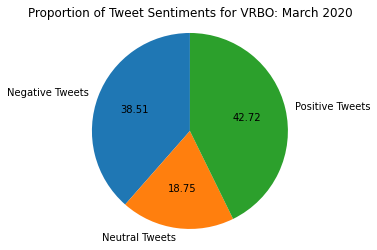

In [ ]:
#Plot the sentiment of Vrbo March 2020 tweets
import matplotlib.pyplot as plotter

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for VRBO: March 2020')

plotter.show()

##Section 2: Sentiment Analysis of Vrbo tweets from March 2021

In [ ]:
#Read the Vrbo tweets from March 2021
vrbo_2 = pd.read_json('vrbo_2.json', lines=True)

In [ ]:
#Remove tweets created by Vrbo
users = []
for index, row in vrbo_2.iterrows():
    users.append(row['user']['username'])
vrbo_2['username'] = users
vrbo_2 = vrbo_2[vrbo_2['username'] != 'vrbo']
vrbo_2

url  ...         username
0     https://twitter.com/ExpediaGroup/status/137704...  ...     ExpediaGroup
1     https://twitter.com/sharpe_grant/status/137704...  ...     sharpe_grant
2     https://twitter.com/nanaxo88/status/1377038339...  ...         nanaxo88
3     https://twitter.com/Earl_GreyT/status/13770368...  ...       Earl_GreyT
4     https://twitter.com/hostfully/status/137703294...  ...        hostfully
...                                                 ...  ...              ...
5412  https://twitter.com/KristenMaizon/status/13661...  ...    KristenMaizon
5413  https://twitter.com/ChrisBu29550966/status/136...  ...  ChrisBu29550966
5414  https://twitter.com/Gr8nessDiaries/status/1366...  ...   Gr8nessDiaries
5415  https://twitter.com/ChrisBu29550966/status/136...  ...  ChrisBu29550966
5416  https://twitter.com/Luvbeingamomof3/status/136...  ...  Luvbeingamomof3

[5171 rows x 24 columns]

In [ ]:
#Remove the 3K advertisment and save the tweets and dates for Vrbo March 2021
vrbo_2_tweets = [row[1]['content'] for row in vrbo_2.iterrows() if '$3K' not in row[1]['content']]
vrbo_2_dates = [row[1]['date'].date() for row in vrbo_2.iterrows() if '$3K' not in row[1]['content']]

In [ ]:
#Clean the Vrbo tweets from March 2021 and make sure the cleaning worked
vrbo_2_tweets = [re.sub(combined_pat, '', w) for w in vrbo_2_tweets]
vrbo_2_tweets

['According to vrbo, trips built around families are on the rise and many have already booked rentals for the summer. 👨\u200d👧\u200d👦🏠🧳 via WSJ  ',
 'ETommyBS1 The VRBO commercial that runs on the Golf Channel, it is pure torture and I run for the remote.',
 'Enter for a chance to win $5K for a Yes Day Stay from Vrbo ',
 'jasthemetiche AirbnbHelp Airbnb In the meantime you could use another booking platform, such as Booking dot com or VRBO dot com. You may even find the same listing, as many hosts are now listing on multiple platforms, often at lower prices.',
 "We are excited to be hosting an upcoming webinar again with our amazing partners at Vrbo. To make sure it is as relevant to you as possible, we'd like your input into what you want to see presented: travel marketing shorttermrentals vacationrental",
 "Um.....I'd like to stay here. Is it listed on VRBO!?!?!? 😉 ",
 'caromdixon Airbnb lol we’re going to Providence RI with dad and Linda in September to go to a wedding, don’t worry 

In [ ]:
#Append the sentiment to each tweet
vrbo_2_sentiment = []
for a in vrbo_2_tweets:
    vrbo_2_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))
vrbo_2_sentiment

[('According to vrbo, trips built around families are on the rise and many have already booked rentals for the summer. 👨\u200d👧\u200d👦🏠🧳 via WSJ  ',
  0.0),
 ('ETommyBS1 The VRBO commercial that runs on the Golf Channel, it is pure torture and I run for the remote.',
  -0.5994),
 ('Enter for a chance to win $5K for a Yes Day Stay from Vrbo ', 0.8176),
 ('jasthemetiche AirbnbHelp Airbnb In the meantime you could use another booking platform, such as Booking dot com or VRBO dot com. You may even find the same listing, as many hosts are now listing on multiple platforms, often at lower prices.',
  -0.296),
 ("We are excited to be hosting an upcoming webinar again with our amazing partners at Vrbo. To make sure it is as relevant to you as possible, we'd like your input into what you want to see presented: travel marketing shorttermrentals vacationrental",
  0.8834),
 ("Um.....I'd like to stay here. Is it listed on VRBO!?!?!? 😉 ", 0.6015),
 ('caromdixon Airbnb lol we’re going to Providence 

In [ ]:
#Seperate the Vrbo March 2021 tweets by sentiment
negs = len([a for a in vrbo_2_sentiment if a[1] < -.05]) / len(vrbo_2_sentiment)
neutrals = len([a for a in vrbo_2_sentiment if a[1] > -.05 if a[1] < .05]) / len(vrbo_2_sentiment)
positives = len([a for a in vrbo_2_sentiment if a[1] > .05]) / len(vrbo_2_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

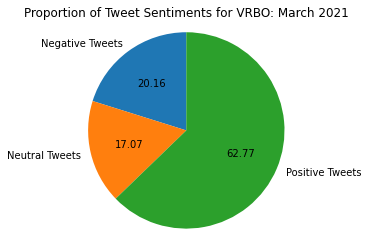

In [ ]:
#Plot Vrbo tweet sentiments from March 2021
import matplotlib.pyplot as plotter

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for VRBO: March 2021')

plotter.show()

##Section 3: Word Cloud Comparison of Positive and Negative Vrbo Tweets from March 2020/2021

In [ ]:
#Import necessary libraries for word cloud generation
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
#Find the subset of only negative sentiment tweets for Vrbo from March 2020
neg_vrbo_1_tweets = [a[0] for a in vrbo_1_sentiment if a[1] < -.05]
neg_vrbo_1_tweets_text = " ".join(neg_vrbo_1_tweets)

In [ ]:
#Remove common words that would skew the word cloud generation
banned = ['Vrbo','VRBO','vrbo', 'Airbnb', 'airbnb', 'AirBnB', 'amp', 'https://t.co/', 'EmmeRylan', 'teenystweeting']
split_text = neg_vrbo_1_tweets_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')

In [ ]:
#Rejoin the March 2020 Vrbo Negative sentiment tweets
neg_vrbo_1_tweets_text = " ".join(split_text)

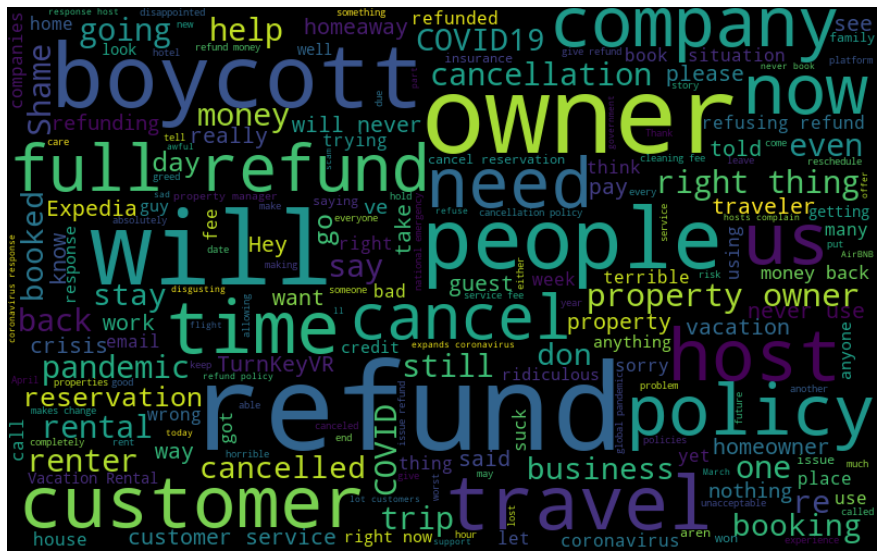

In [ ]:
#Display a word cloud of the March 2020 Vrbo negative sentiment tweets
wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(neg_vrbo_1_tweets_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Same process as above
pos_vrbo_1_tweets = [a[0] for a in vrbo_1_sentiment if a[1] > .05]
pos_vrbo_1_tweets_text = " ".join(pos_vrbo_1_tweets)

In [ ]:
#Same process as above
split_text = pos_vrbo_1_tweets_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')

In [ ]:
#Same process as above
pos_vrbo_1_tweets_text = " ".join(split_text)

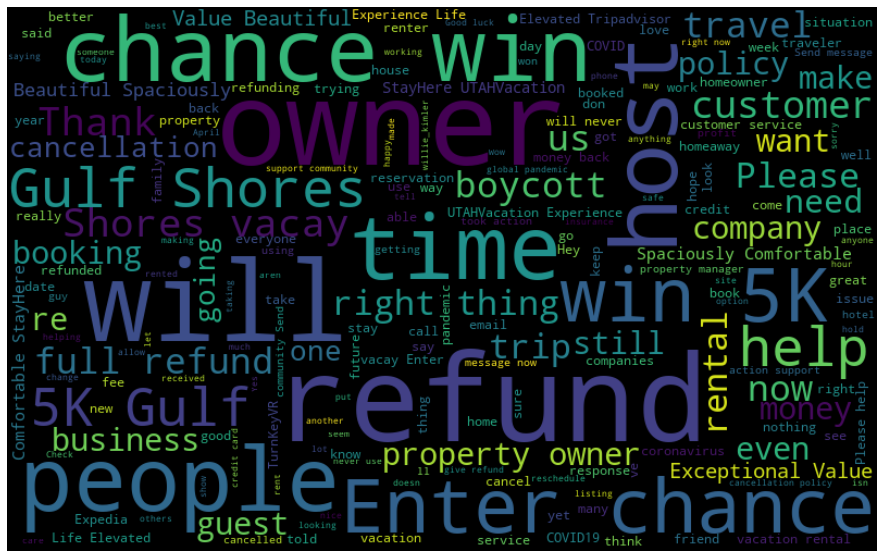

In [ ]:
#Display word cloud of Vrbo positive tweets from March 2020
wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(pos_vrbo_1_tweets_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

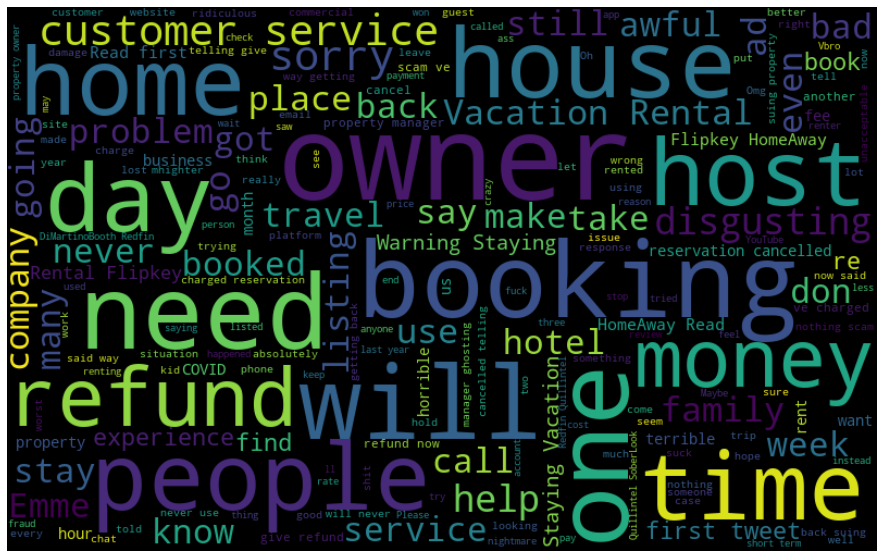

In [ ]:
#Same process as above and display Vrbo negative tweets from March 2021 word cloud 
neg_vrbo_2_tweets = [a[0] for a in vrbo_2_sentiment if a[1] < -.05]
neg_vrbo_2_tweets_text = " ".join(neg_vrbo_2_tweets)

split_text = neg_vrbo_2_tweets_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
neg_vrbo_2_tweets_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(neg_vrbo_2_tweets_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

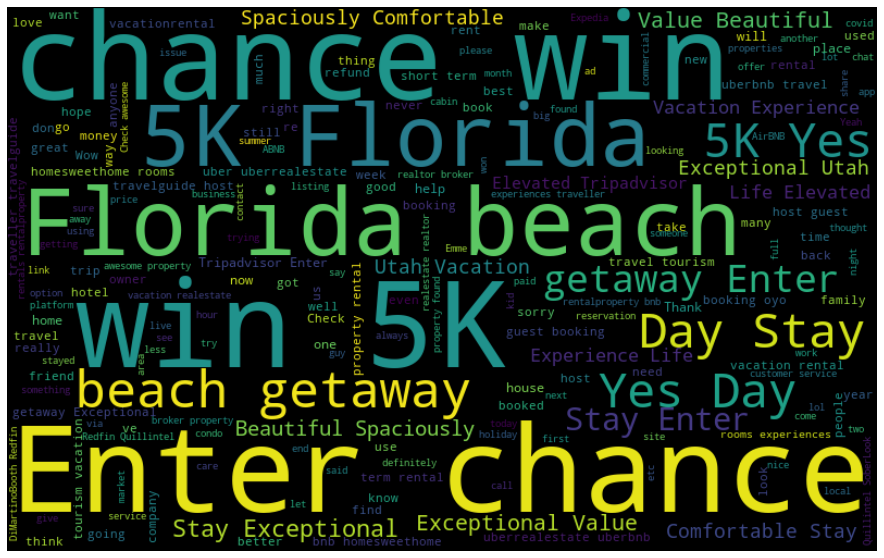

In [ ]:
#Same process as above and display Vrbo positive tweets from March 2021 word cloud 
pos_vrbo_2_tweets = [a[0] for a in vrbo_2_sentiment if a[1] > .05]
pos_vrbo_2_tweets_text = " ".join(pos_vrbo_2_tweets)

split_text = pos_vrbo_2_tweets_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
pos_vrbo_2_tweets_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(pos_vrbo_2_tweets_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Section 4: Sentiment Analysis of AirBnB tweets from March 2020 and March 2021
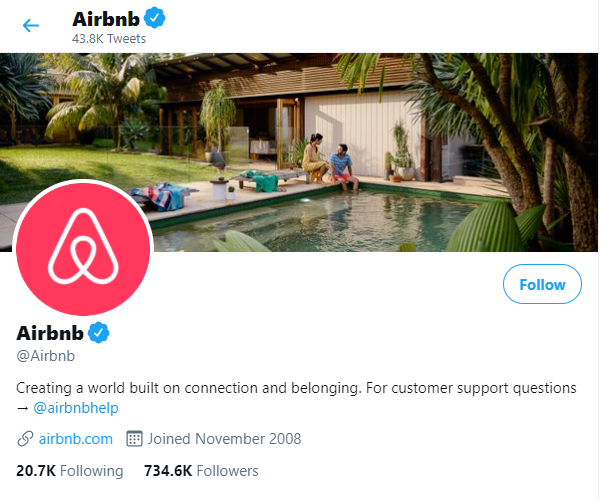


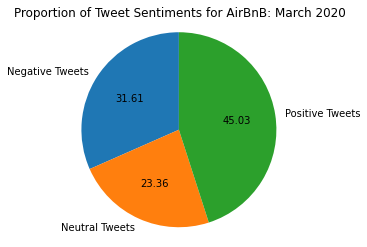

In [ ]:
#Read, clean, add sentiment, and display sentiment via pie chart for March 2020 AirBnB tweets
airbnb_1 = pd.read_json('./airbnb_1.json', lines=True)

users = []
for index, row in airbnb_1.iterrows():
    users.append(row['user']['username'])
airbnb_1['username'] = users
airbnb_1 = airbnb_1[airbnb_1['username'] != 'vrbo']

airbnb_1_tweets = [row[1]['content'] for row in airbnb_1.iterrows() if '$3K' not in row[1]['content']]
airbnb_1_dates = [row[1]['date'].date() for row in airbnb_1.iterrows() if '$3K' not in row[1]['content']]

airbnb_1_tweets = [re.sub(combined_pat, '', w) for w in airbnb_1_tweets]

airbnb_1_sentiment = []
for a in airbnb_1_tweets:
    airbnb_1_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))

negs = len([a for a in airbnb_1_sentiment if a[1] < -.05]) / len(airbnb_1_sentiment)
neutrals = len([a for a in airbnb_1_sentiment if a[1] > -.05 if a[1] < .05]) / len(airbnb_1_sentiment)
positives = len([a for a in airbnb_1_sentiment if a[1] > .05]) / len(airbnb_1_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for AirBnB: March 2020')

plotter.show()

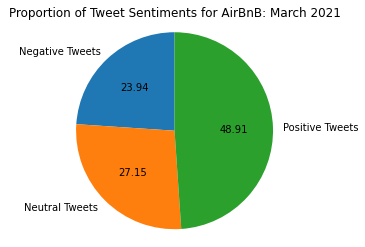

In [ ]:
#Read, clean, add sentiment, and display sentiment via pie chart for March 2021 AirBnB tweets
airbnb_2 = pd.read_json('airbnb_2.json', lines=True)

users = []
for index, row in airbnb_2.iterrows():
    users.append(row['user']['username'])
airbnb_2['username'] = users
airbnb_2 = airbnb_2[airbnb_2['username'] != 'vrbo']

airbnb_2_tweets = [row[1]['content'] for row in airbnb_2.iterrows() if '$3K' not in row[1]['content']]
airbnb_2_dates = [row[1]['date'].date() for row in airbnb_2.iterrows() if '$3K' not in row[1]['content']]

airbnb_2_tweets = [re.sub(combined_pat, '', w) for w in airbnb_2_tweets]

airbnb_2_sentiment = []
for a in airbnb_2_tweets:
    airbnb_2_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))

negs = len([a for a in airbnb_2_sentiment if a[1] < -.05]) / len(airbnb_2_sentiment)
neutrals = len([a for a in airbnb_2_sentiment if a[1] > -.05 if a[1] < .05]) / len(airbnb_2_sentiment)
positives = len([a for a in airbnb_2_sentiment if a[1] > .05]) / len(airbnb_2_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for AirBnB: March 2021')

plotter.show()

##Section 5: Sentiment Analysis of Hotels.com tweets from March 2020 and March 2021

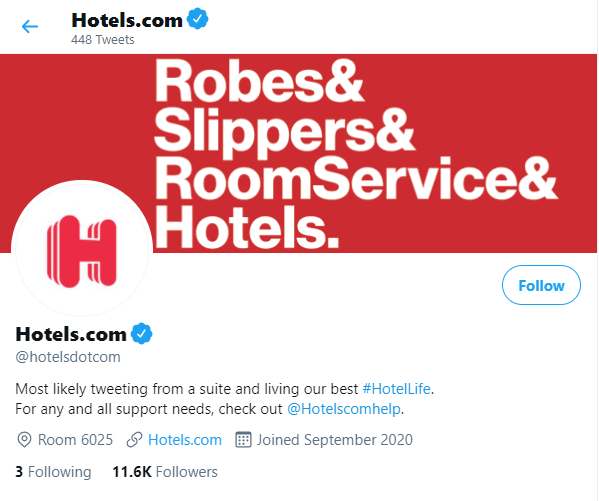


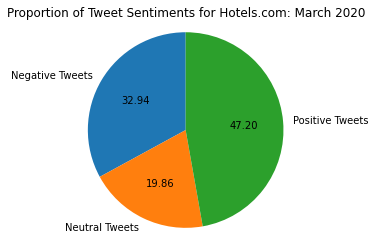

In [ ]:
#Read, clean, add sentiment, and display sentiment via pie chart for March 2020 Hotels.com tweets
hotels_1 = pd.read_json('hotelsdotcom_1.json', lines=True)

users = []
for index, row in hotels_1.iterrows():
    users.append(row['user']['username'])
hotels_1['username'] = users
hotels_1 = hotels_1[hotels_1['username'] != 'vrbo']

hotels_1_tweets = [row[1]['content'] for row in hotels_1.iterrows() if '$3K' not in row[1]['content']]
hotels_1_dates = [row[1]['date'].date() for row in hotels_1.iterrows() if '$3K' not in row[1]['content']]

hotels_1_tweets = [re.sub(combined_pat, '', w) for w in hotels_1_tweets]

hotels_1_sentiment = []
for a in hotels_1_tweets:
    hotels_1_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))

negs = len([a for a in hotels_1_sentiment if a[1] < -.05]) / len(hotels_1_sentiment)
neutrals = len([a for a in hotels_1_sentiment if a[1] > -.05 if a[1] < .05]) / len(hotels_1_sentiment)
positives = len([a for a in hotels_1_sentiment if a[1] > .05]) / len(hotels_1_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for Hotels.com: March 2020')

plotter.show()

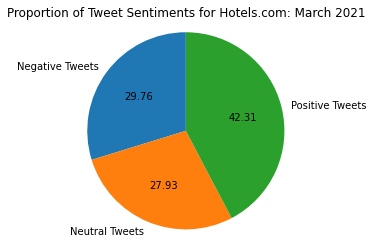

In [ ]:
#Read, clean, add sentiment, and display sentiment via pie chart for March 2021 Hotels.com tweets
hotels_2 = pd.read_json('hotelsdotcom_2.json', lines=True)

users = []
for index, row in hotels_2.iterrows():
    users.append(row['user']['username'])
hotels_2['username'] = users
hotels_2 = hotels_2[hotels_2['username'] != 'vrbo']

hotels_2_tweets = [row[1]['content'] for row in hotels_2.iterrows() if '$3K' not in row[1]['content']]
hotels_2_dates = [row[1]['date'].date() for row in hotels_2.iterrows() if '$3K' not in row[1]['content']]

hotels_2_tweets = [re.sub(combined_pat, '', w) for w in hotels_2_tweets]

hotels_2_sentiment = []
for a in hotels_2_tweets:
    hotels_2_sentiment.append((a, sentiment_analyzer_scores(a)['compound']))

negs = len([a for a in hotels_2_sentiment if a[1] < -.05]) / len(hotels_2_sentiment)
neutrals = len([a for a in hotels_2_sentiment if a[1] > -.05 if a[1] < .05]) / len(hotels_2_sentiment)
positives = len([a for a in hotels_2_sentiment if a[1] > .05]) / len(hotels_2_sentiment)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of Tweet Sentiments for Hotels.com: March 2021')

plotter.show()

##Section 6: Further analysis into "refund" tweets from Vrbo in March 2020 and March 2021
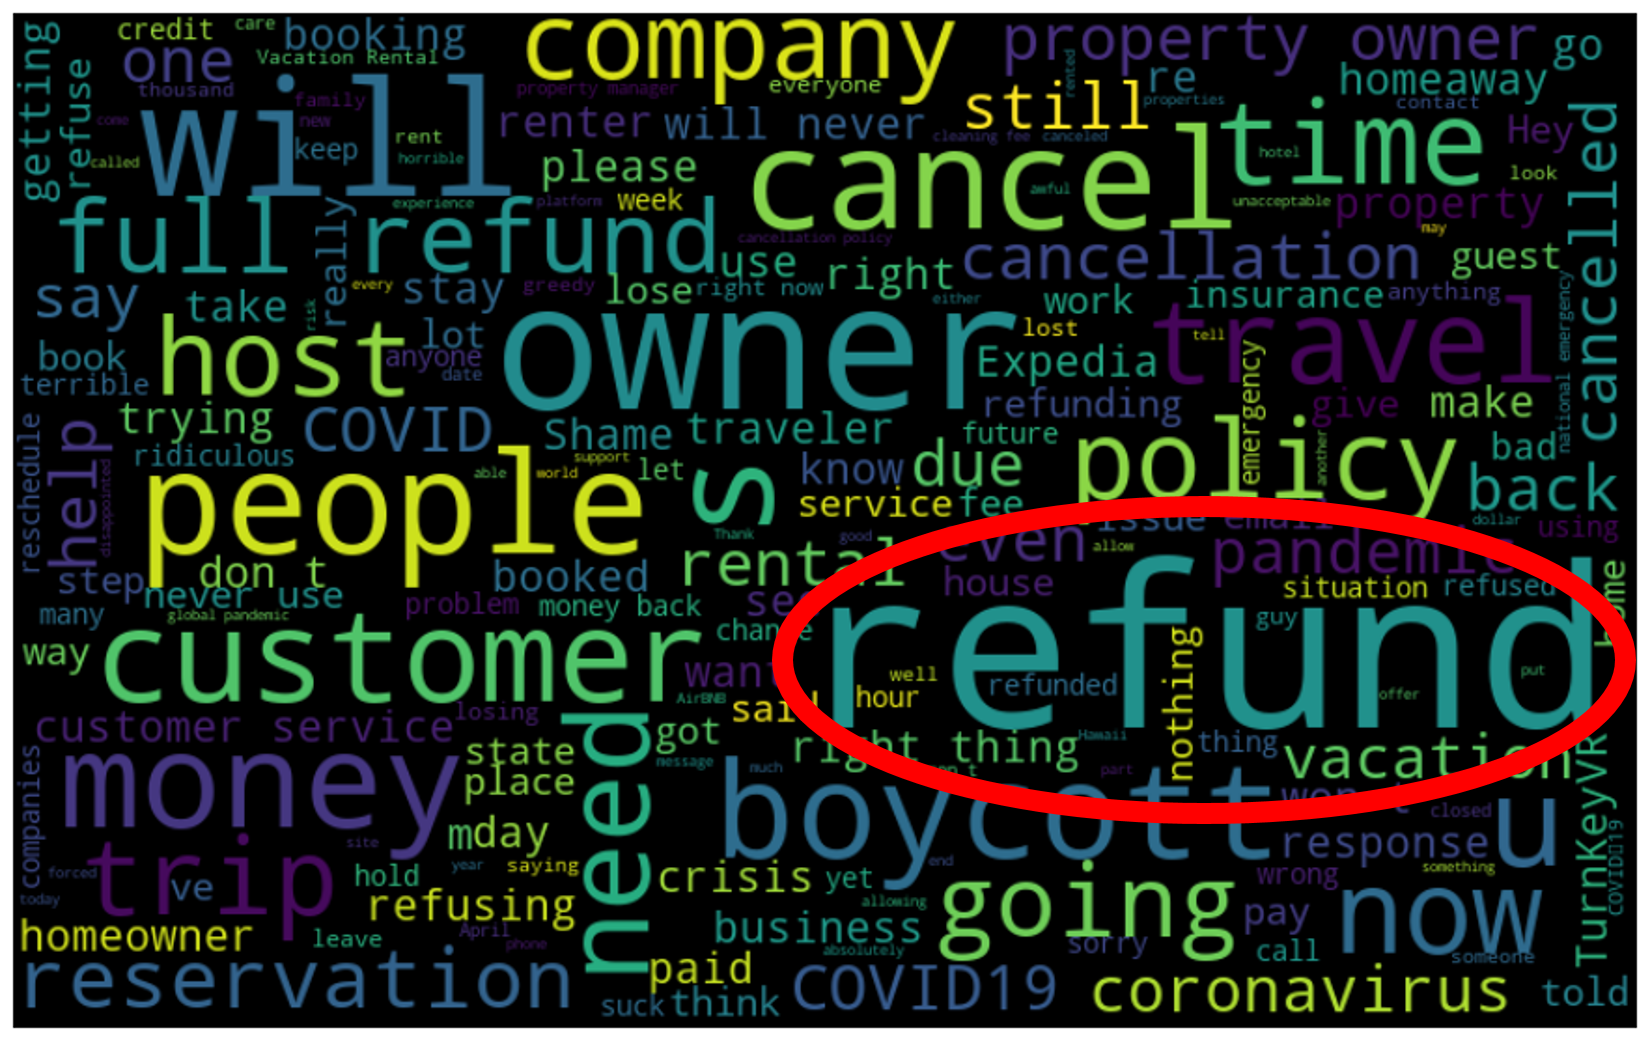



In [ ]:
#Find the tweets that mention "refund" in the Vrbo Tweets
refund_tweets_1 = [(a[0], a[1]) for a in vrbo_1_sentiment if 'refund' in a[0]]
refund_tweets_2 = [(a[0], a[1]) for a in vrbo_2_sentiment if 'refund' in a[0]]

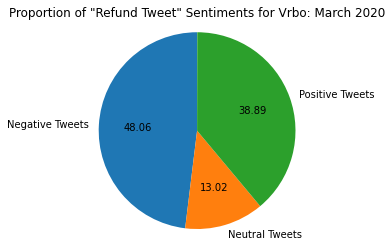

In [ ]:
#Display sentiment for Vrbo tweets mentioning refund in March 2020
negs = len([a for a in refund_tweets_1 if a[1] < -.05]) / len(refund_tweets_1)
neutrals = len([a for a in refund_tweets_1 if a[1] > -.05 if a[1] < .05]) / len(refund_tweets_1)
positives = len([a for a in refund_tweets_1 if a[1] > .05]) / len(refund_tweets_1)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for Vrbo: March 2020')

plotter.show()

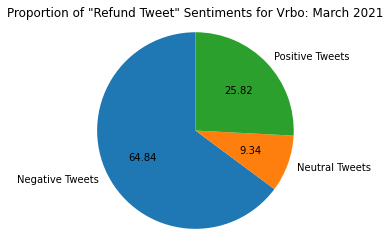

In [ ]:
#Display sentiment for Vrbo tweets mentioning refund in March 2021
negs = len([a for a in refund_tweets_2 if a[1] < -.05]) / len(refund_tweets_2)
neutrals = len([a for a in refund_tweets_2 if a[1] > -.05 if a[1] < .05]) / len(refund_tweets_2)
positives = len([a for a in refund_tweets_2 if a[1] > .05]) / len(refund_tweets_2)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for Vrbo: March 2021')

plotter.show()

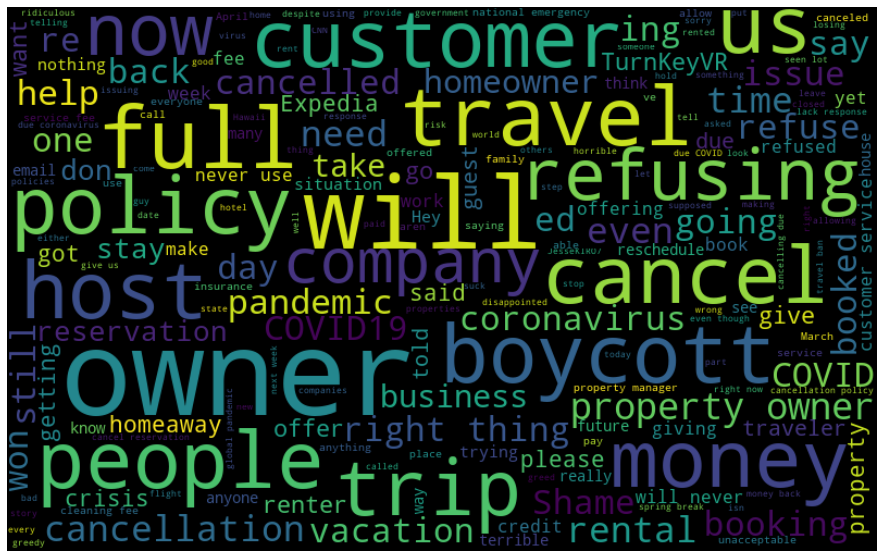

In [ ]:
#Display word Cloud for Vrbo tweets mentioning refund in March 2020 with negative sentiment
neg_vrbo_1_tweets_refund = [a[0] for a in vrbo_1_sentiment if a[1] < -.05 if 'refund' in a[0]]

neg_vrbo_1_tweets_refund_text = " ".join(neg_vrbo_1_tweets_refund)

split_text = neg_vrbo_1_tweets_refund_text.split()
banned.append('refund')
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
neg_vrbo_1_tweets_refund_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(neg_vrbo_1_tweets_refund_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Some Exapmple negative refund tweets
neg_vrbo_1_tweets_refund

['darrenrovell Vrbo no refund for 4/20. Did get a credit but only for limited dates',
 'JEichenblatt Airbnb yashar I had my 30th birthday planned for last week and vrbo refused to refund it. So I guess my birthday present was spending hundreds on a trip I literally couldn’t take.',
 "darrenrovell TurnKeyVR is not offering refunds.  They continue to blame others for not being able to offer refunds which is not true. Over $400k lost by renters... vrbo should help facilitate but can't...? ",
 'radicalskye vrbo vrbo this isn’t okay wtf, the company needs to give a refund or reschedule with little to no cost at least',
 'CJErickson4 Gibbler85 vrbo vacasa RentalsMaui 👎dumbest thing I’ve ever heard. Dangerous implications if people choose to get it just to get the refund. I’m curious to see if they make the right choice and pay me (and others who deserve it). They’ll go out of business if they abuse this.',
 'RobertOzn1 AirbnbHelp vrbo latimestravel ... prepare for issues and interruptions li

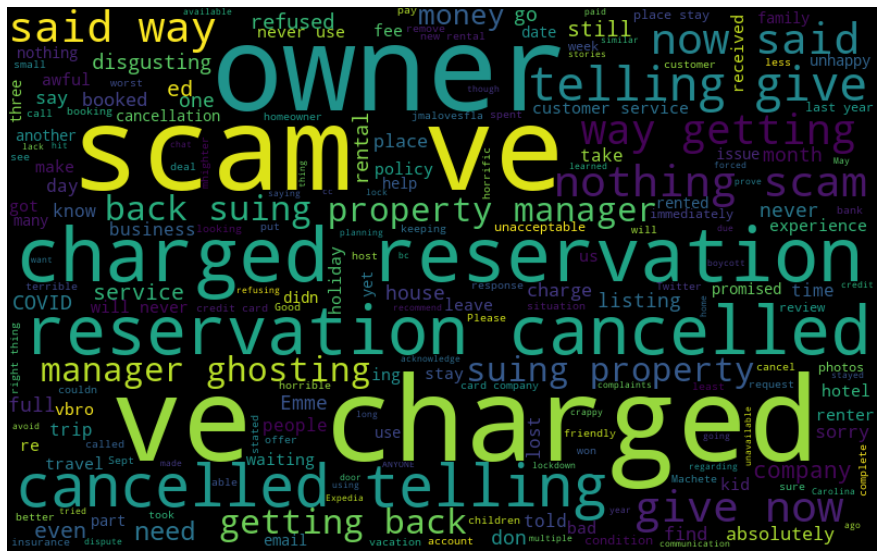

In [ ]:
#Display word cloud for Vrbo tweets mentioning refund in March 2021 with negaitve sentiment
neg_vrbo_2_tweets_refund = [a[0] for a in vrbo_2_sentiment if a[1] < -.05 if 'refund' in a[0]]

neg_vrbo_2_tweets_refund_text = " ".join(neg_vrbo_2_tweets_refund)

split_text = neg_vrbo_2_tweets_refund_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
neg_vrbo_2_tweets_refund_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(neg_vrbo_2_tweets_refund_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#March 2021 Vrbo negative refund tweets
neg_vrbo_2_tweets_refund

['vrbo KeeleyRussell4 hi we booked a property. Owner refused to move the date even though it was lockdown and has refused full refund. We’ve emailed you, no response! Please help. Owner still advertising on your website 🤷\u200d♀️',
 'Lesson learned. vrbo will make you plea with an aggressive property owner for a refund because they don’t think they need to put a lock on the door to a home and you’re forced to find alternative accommodations. How does this make sense at all?!',
 'vrbo still waiting on refund of service costs 13 business days after cancelled booking ?',
 'vrbo I already talked to multiple people at VRBO to no avail. Conflicting stories about why I haven’t received my refund. You say you sent it but my credit card company has no record of it. Another says the host has the money. Just awful service',
 'A WARNING: for those planning for some long awaited travel, avoid vrbo Some seriously shady and/or incompetent biz practices regarding refunds on cancelled reservations. Bes

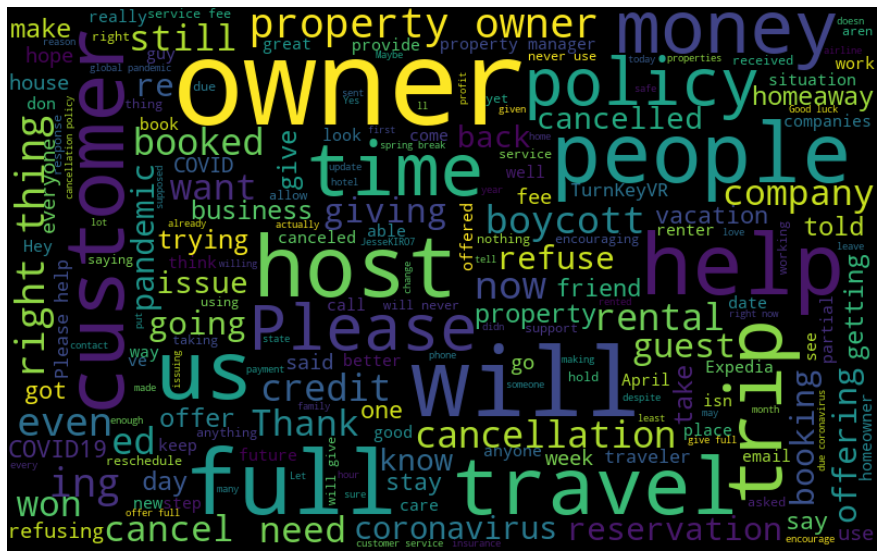

In [ ]:
#Display word cloud for Vrbo tweets mentioning refund in March 2020 with positive sentiment
pos_vrbo_1_tweets_refund = [a[0] for a in vrbo_1_sentiment if a[1] > .05 if 'refund' in a[0]]

pos_vrbo_1_tweets_refund_text = " ".join(pos_vrbo_1_tweets_refund)

split_text = pos_vrbo_1_tweets_refund_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
pos_vrbo_1_tweets_refund_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(pos_vrbo_1_tweets_refund_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Vrbo March 2020 postive refund tweets
pos_vrbo_1_tweets_refund

['darrenrovell We put $500 deposit down on vrbo listed property. Was for GFs graduation May 8-10 in NH that has since been cancelled. We aren’t being charged additional price of the rental and vrbo is refunding their fees, but rental company is keeping ~$350',
 'AnnaSeavey radicalskye vrbo all our flights were cancelled and refunded so how is it fair for you to keep the money when we can’t event get there?',
 'Techmeme Good for Airbnb !!!  Meanwhile vrbo and londonconnection won’t give ANY refund. They have taken the word “customer” out of their language.',
 "JustinHerzig darrenrovell vrbo Yep, same here.had to reschedule while our friends rec'd refund",
 "vrbo I cancelled my rental and was given a full refund by the owner. That refund has not appeared on my credit card yet...it's been 8 business days. Please advise.",
 "darrenrovell vrbo and the owner Jacci w/ WayneEstates by YGM Air won't issue a refund or credit. Booked trip to play Pebble Beach May 1st. It's closed until May 18 and

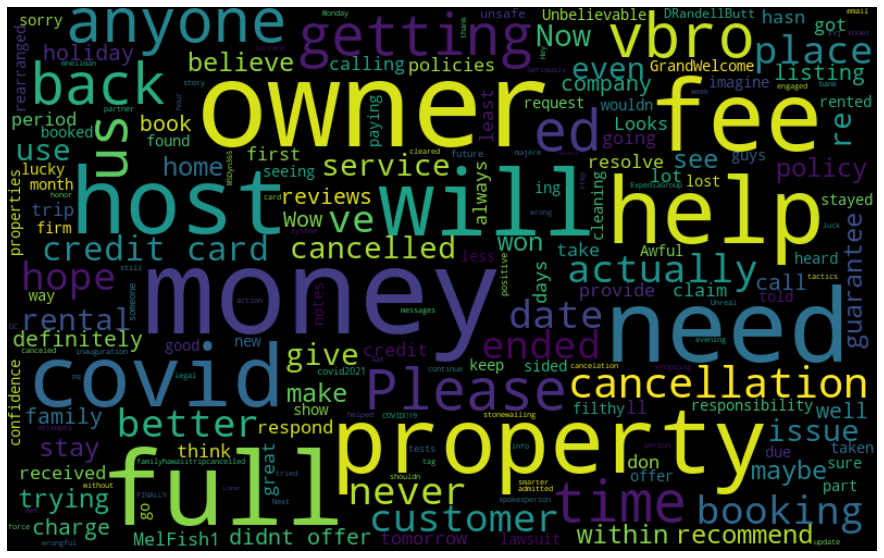

In [ ]:
#Display word cloud for Vrbo tweets mentioning refund in March 2021 with positive sentiment
pos_vrbo_2_tweets_refund = [a[0] for a in vrbo_2_sentiment if a[1] > .05 if 'refund' in a[0]]

pos_vrbo_2_tweets_refund_text = " ".join(pos_vrbo_2_tweets_refund)

split_text = pos_vrbo_2_tweets_refund_text.split()
for i in range(0, len(split_text)):
    for a in banned:
        if a in split_text[i]:
            split_text[i] = split_text[i].replace(a, '')
            
pos_vrbo_2_tweets_refund_text = " ".join(split_text)

wordcloud = WordCloud(collocations=True, width=800, height=500, max_font_size=110).generate(pos_vrbo_2_tweets_refund_text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#March 2021 Vrbo positve refund tweets
pos_vrbo_2_tweets_refund

['vrbo What do you recommend property owners to do if someone tests positive for covid and a trip needs to be cancelled?  The property owner will not provide us with a refund or a credit for a future stay.  covidvrbo2021 familyhawaiitripcancelled COVIDー19',
 'It’s Monday which means it’s time for my vrbo update! We 🚨 FINALLY received the info about getting a refund on Sat evening a whopping 27 days after we first engaged. Had to tag their PR person MelFish1 who I think helped (thank you!) however it shouldn’t have come to this!',
 'I was just calling vrbo out, but ACTUALLY, maybe we all need to be smarter — host your home, and then claim “force majere” and you never have to refund anyone booking fees under their current policies',
 'Hey MelFish1 I tried to email you without luck but as the vrbo spokesperson I need your help. Please see my story below I have been trying for 25 days to get wrongful credit card charges cleared and vrbo has admitted to being wrong but still hasn’t refunded

##Section 7: Comparitive analysis of "refund" tweet sentiment analysis with AirBnB and Hotels.com from March 2020 / March 2021

In [ ]:
#Collect AirBnB refund tweets for March 2020 and 2021
airbnb_refund_tweets_1 = [(a[0], a[1]) for a in airbnb_1_sentiment if 'refund' in a[0]]
airbnb_refund_tweets_2 = [(a[0], a[1]) for a in airbnb_2_sentiment if 'refund' in a[0]]

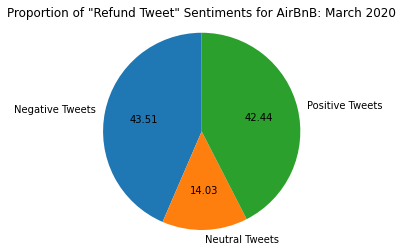

In [ ]:
#Display sentiment of March 2020 Airbnb refund tweets 
negs = len([a for a in airbnb_refund_tweets_1 if a[1] < -.05]) / len(airbnb_refund_tweets_1)
neutrals = len([a for a in airbnb_refund_tweets_1 if a[1] > -.05 if a[1] < .05]) / len(airbnb_refund_tweets_1)
positives = len([a for a in airbnb_refund_tweets_1 if a[1] > .05]) / len(airbnb_refund_tweets_1)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for AirBnB: March 2020')

plotter.show()

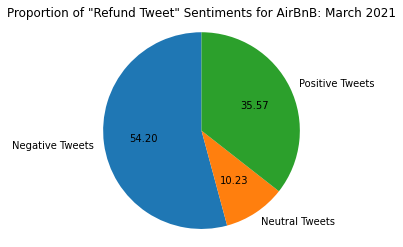

In [ ]:
#Display sentiment of March 2021 Airbnb refund tweets 
negs = len([a for a in airbnb_refund_tweets_2 if a[1] < -.05]) / len(airbnb_refund_tweets_2)
neutrals = len([a for a in airbnb_refund_tweets_2 if a[1] > -.05 if a[1] < .05]) / len(airbnb_refund_tweets_2)
positives = len([a for a in airbnb_refund_tweets_2 if a[1] > .05]) / len(airbnb_refund_tweets_2)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for AirBnB: March 2021')

plotter.show()

In [ ]:
#Collect hotels.com refund tweets for March 2020 and 2021
hotels_refund_tweets_1 = [(a[0], a[1]) for a in hotels_1_sentiment if 'refund' in a[0]]
hotels_refund_tweets_2 = [(a[0], a[1]) for a in hotels_2_sentiment if 'refund' in a[0]]

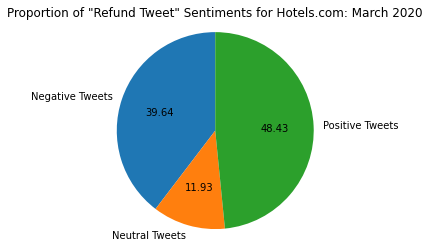

In [ ]:
#Display sentiment of March 2020 Hotels.com refund tweets 
negs = len([a for a in hotels_refund_tweets_1 if a[1] < -.05]) / len(hotels_refund_tweets_1)
neutrals = len([a for a in hotels_refund_tweets_1 if a[1] > -.05 if a[1] < .05]) / len(hotels_refund_tweets_1)
positives = len([a for a in hotels_refund_tweets_1 if a[1] > .05]) / len(hotels_refund_tweets_1)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for Hotels.com: March 2020')

plotter.show()

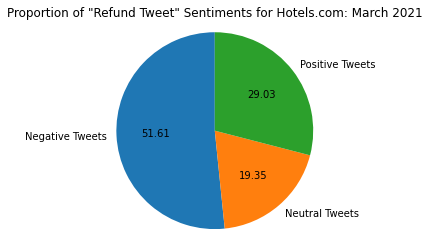

In [ ]:
#Display sentiment of March 2021 Hotels.com refund tweets 
negs = len([a for a in hotels_refund_tweets_2 if a[1] < -.05]) / len(hotels_refund_tweets_2)
neutrals = len([a for a in hotels_refund_tweets_2 if a[1] > -.05 if a[1] < .05]) / len(hotels_refund_tweets_2)
positives = len([a for a in hotels_refund_tweets_2 if a[1] > .05]) / len(hotels_refund_tweets_2)
splits = [negs, neutrals, positives]
labels = ['Negative Tweets', 'Neutral Tweets', 'Positive Tweets']

figureObject, axesObject = plotter.subplots()

axesObject.pie(splits, labels=labels, autopct='%1.2f', startangle=90)

axesObject.axis('equal')

plotter.title('Proportion of "Refund Tweet" Sentiments for Hotels.com: March 2021')

plotter.show()